# EDA of DHS Nightlights data

Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

Reading the merged DHS & Nightlights dataset.

In [2]:
dhs_nightlights_path = "../data/Rwanda_10/DHS_Nightlights/DHS_Nightlights_data.csv"
dhs_nightlights_data = pd.read_csv(dhs_nightlights_path)
dhs_nightlights_data = dhs_nightlights_data.set_index('Cluster_Number')
dhs_nightlights_data.head()

,Mean_Nightlights,Wealth_Score
Cluster_Number,,
1.0,0.109091,-0.386620
2.0,0.000000,-0.421574
3.0,0.000000,-0.449724
4.0,0.000000,-0.390006
5.0,0.000000,-0.416924


## Get a quick sense of the dataset

In [3]:
dhs_nightlights_data.shape

(492, 2)

In [4]:
dhs_nightlights_data.dtypes

Mean_Nightlights    float64
Wealth_Score        float64
dtype: object

In [5]:
dhs_nightlights_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 492 entries, 1.0 to 492.0
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mean_Nightlights  492 non-null    float64
 1   Wealth_Score      492 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB


In [6]:
dhs_nightlights_data.describe()

,Mean_Nightlights,Wealth_Score
count,492.000000,492.000000
mean,3.559818,0.002992
std,9.590184,0.835627
min,0.000000,-0.884895
25%,0.000000,-0.404195
50%,0.000000,-0.288727
75%,0.332025,-0.101608
max,44.239669,4.016780


In [7]:
dhs_nightlights_data.isnull().sum()

Mean_Nightlights    0
Wealth_Score        0
dtype: int64

## Let's observe the correlation between feature and the target

In [8]:
dhs_nightlights_data.corr()

,Mean_Nightlights,Wealth_Score
Mean_Nightlights,1.000000,0.864092
Wealth_Score,0.864092,1.000000


<AxesSubplot:xlabel='Mean_Nightlights', ylabel='Wealth_Score'>

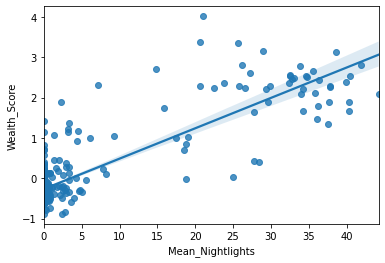

In [9]:
sns.regplot(x=dhs_nightlights_data['Mean_Nightlights'], y=dhs_nightlights_data['Wealth_Score'])

- From the regplot above, we could interpret the slope - for an increase in mean nightlight intesity by 10 units, the wealth score improves by 0.5. This is interpreted only from a small sample of many years of data collection. Are our interpretations statistically significant?
- We need to calculate the confidence interval to find if our interpretations could be trusted. And, in seaborn we can find this through the blue cone around the regression line in the regplot.

## Let's use statsmodels to understand the effect of feature on the target